Pairplot of features colored by cluster:


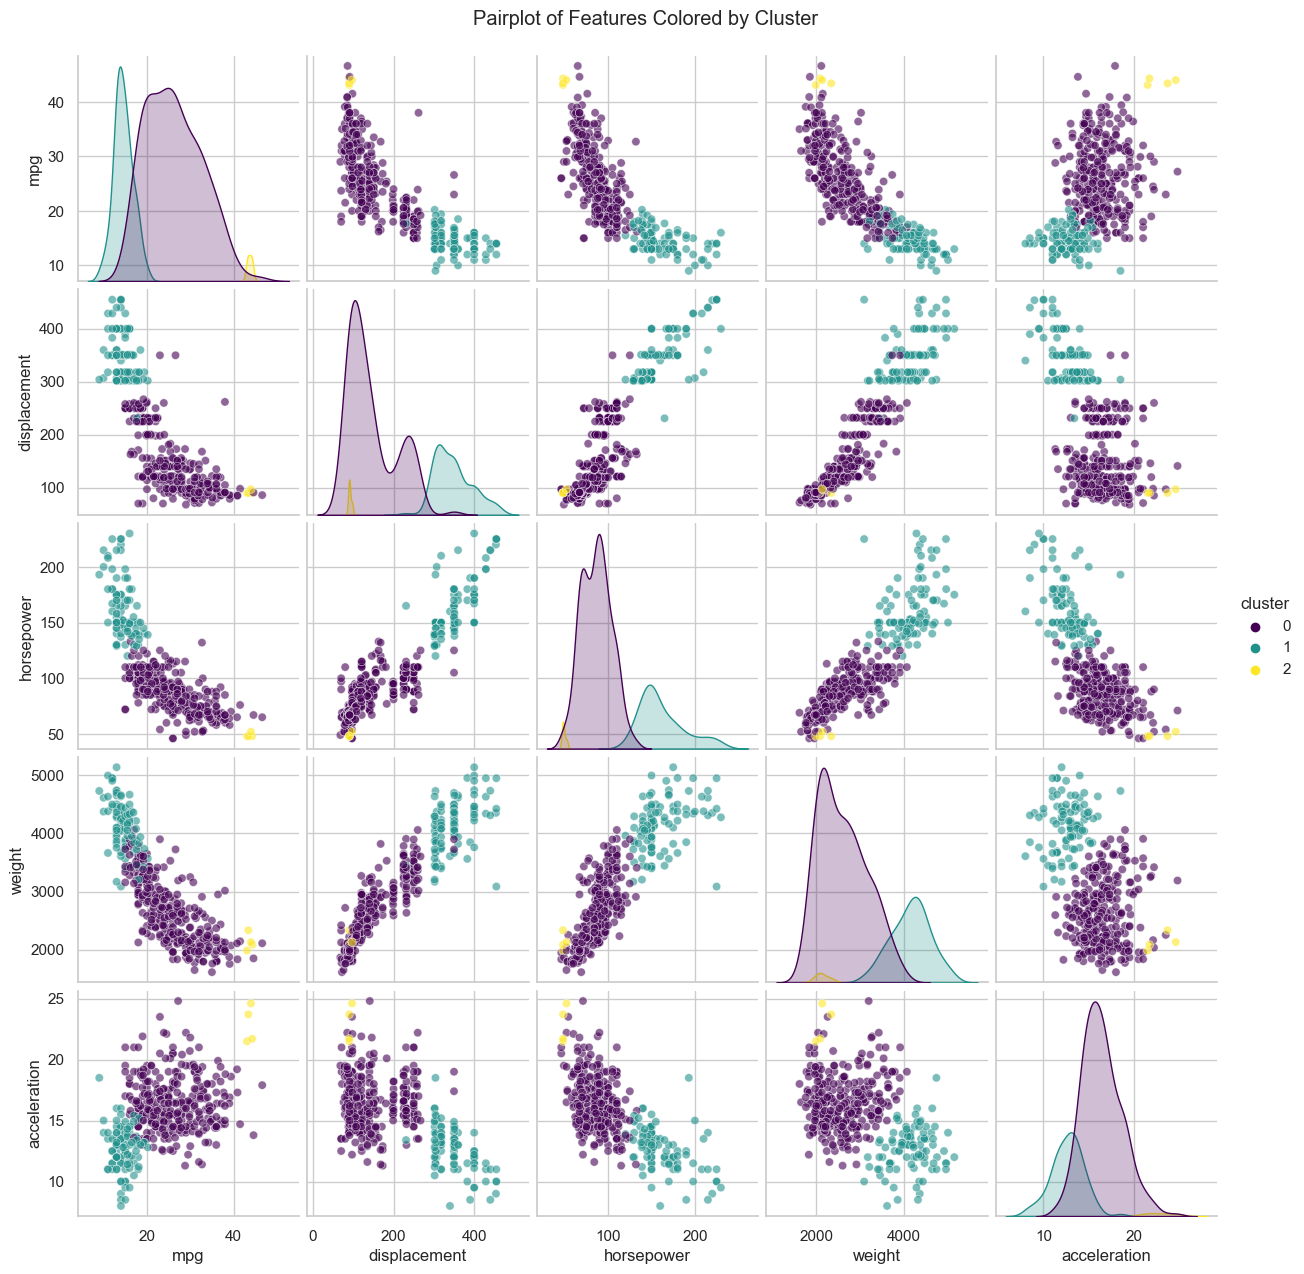

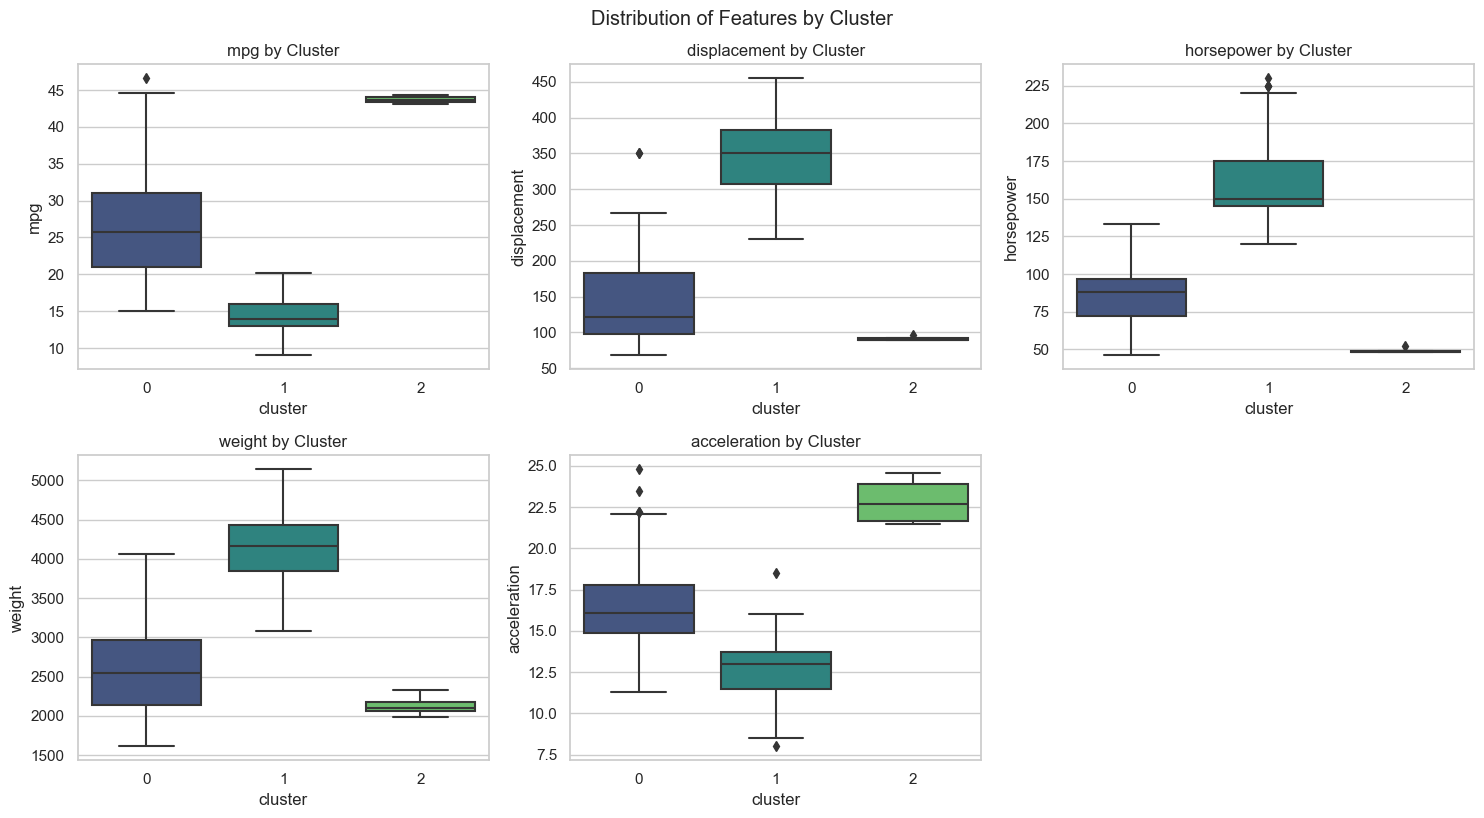

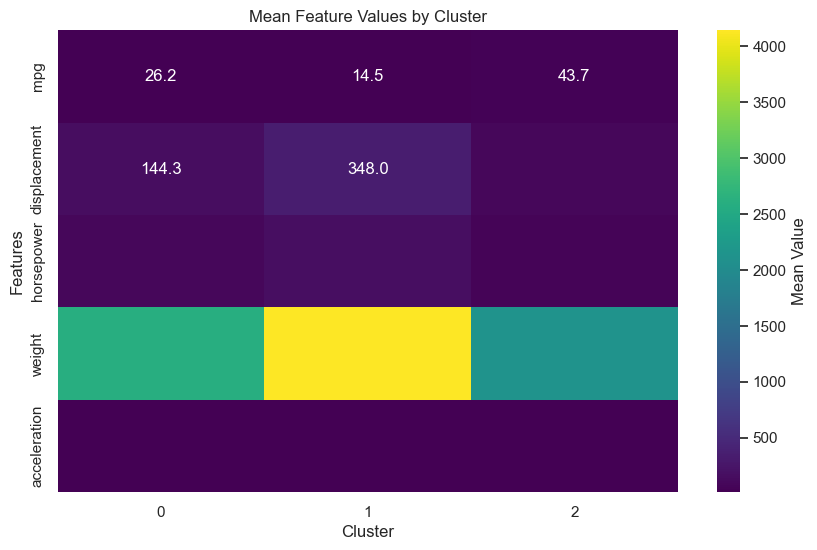

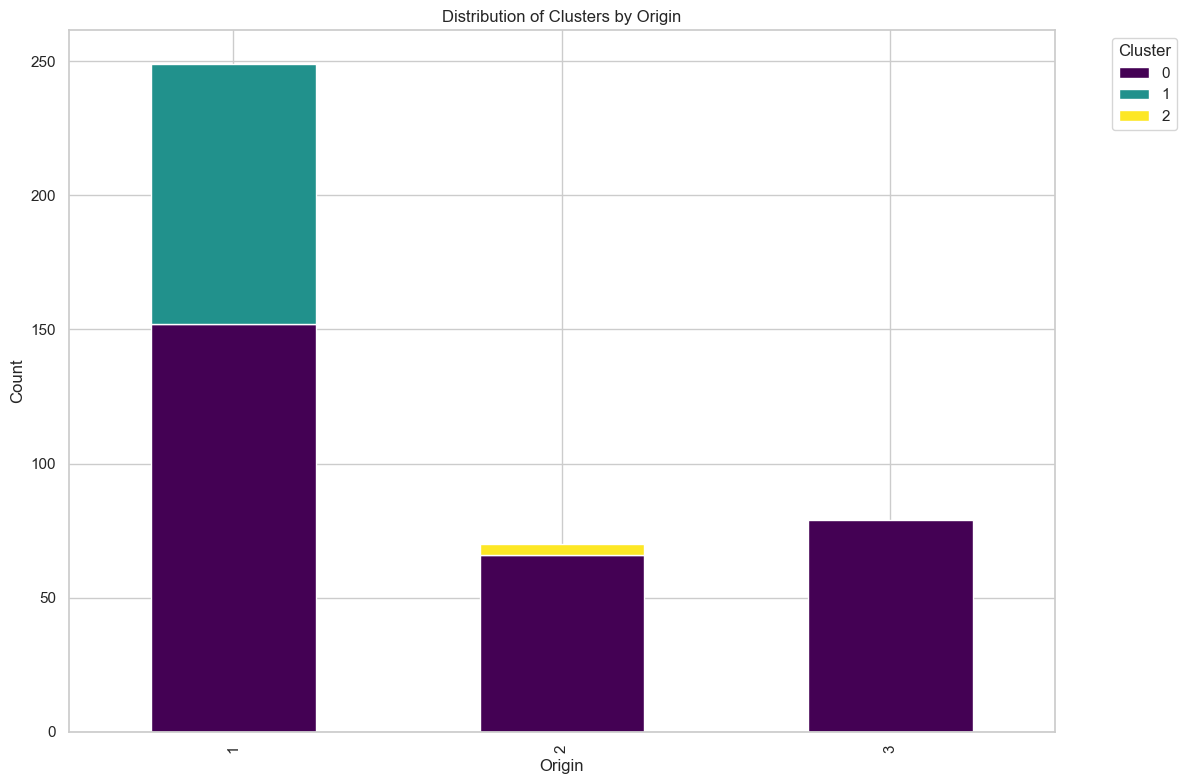

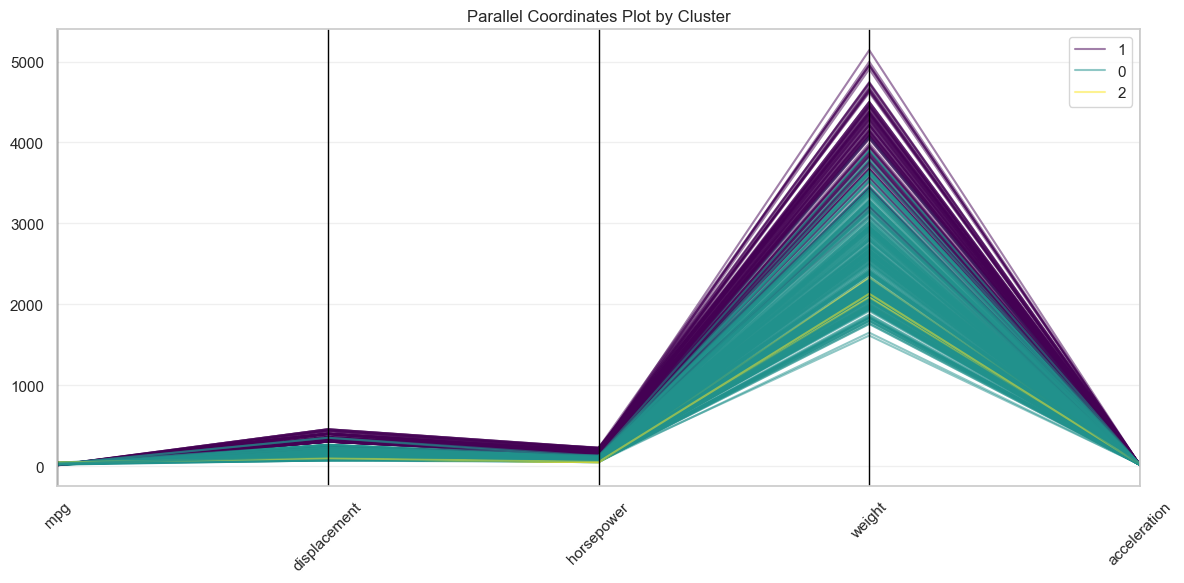

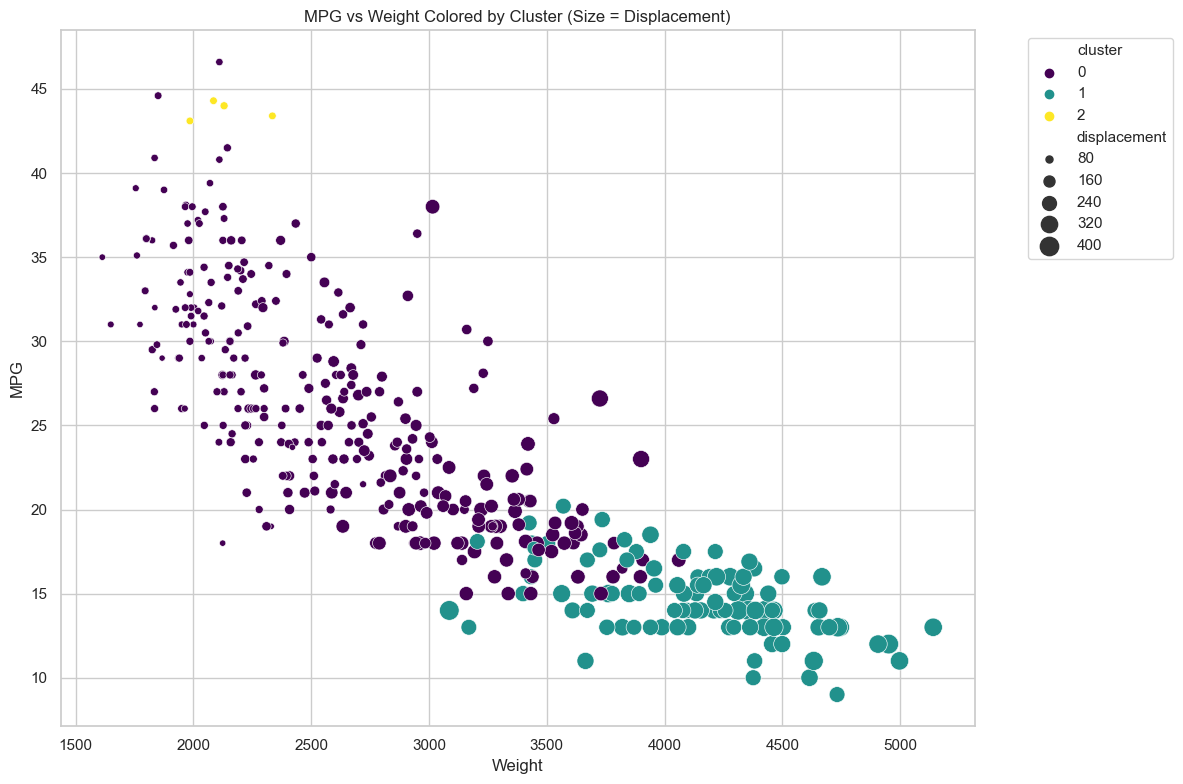


Cluster Statistics:
               mpg            displacement               horsepower  \
              mean        var         mean          var        mean   
cluster                                                               
0        26.177441  41.303375   144.304714  3511.485383   86.120275   
1        14.528866   4.771033   348.020619  2089.499570  161.804124   
2        43.700000   0.300000    91.750000    12.250000   49.000000   

                          weight                acceleration            
                var         mean            var         mean       var  
cluster                                                                 
0        294.554450  2598.414141  299118.709664    16.425589  4.875221  
1        674.075816  4143.969072  193847.051117    12.641237  3.189948  
2          4.000000  2133.750000   21672.916667    22.875000  2.309167  

Origin Class Statistics:
              mpg            displacement               horsepower  \
             mean 

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress FutureWarnings about use_inf_as_na
warnings.filterwarnings("ignore", category=FutureWarning)

# Set style for plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Load data
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 
                'weight', 'acceleration', 'model_year', 'origin', 'car_name']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',
                 names=column_names, delim_whitespace=True, na_values='?')

# Data cleaning
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# Use only continuous features
features = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']
df_cont = df[features]

# Fill missing values with mean
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_cont), columns=features)

# Standardize data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

# Perform clustering
cluster = AgglomerativeClustering(n_clusters=3, linkage='average')
labels = cluster.fit_predict(df_scaled)

# Add cluster labels to DataFrame
df['cluster'] = labels

# Visualization 1: Pairplot of features colored by cluster
print("Pairplot of features colored by cluster:")
pairplot = sns.pairplot(df, vars=features, hue='cluster', palette='viridis', plot_kws={'alpha':0.6})
pairplot.fig.suptitle("Pairplot of Features Colored by Cluster", y=1.02)
plt.show()

# Visualization 2: Boxplots for each feature by cluster
plt.figure(figsize=(15, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='cluster', y=feature, data=df, palette='viridis')
    plt.title(f'{feature} by Cluster')
plt.tight_layout()
plt.suptitle("Distribution of Features by Cluster", y=1.02)
plt.show()

# Visualization 3: Cluster means heatmap
cluster_means = df.groupby('cluster')[features].mean()
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means.T, annot=True, cmap='viridis', fmt='.1f', cbar_kws={'label': 'Mean Value'})
plt.title("Mean Feature Values by Cluster")
plt.ylabel("Features")
plt.xlabel("Cluster")
plt.show()

# Visualization 4: Origin vs Cluster stacked bar chart
cross_tab = pd.crosstab(df['origin'], df['cluster'])
cross_tab.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("Distribution of Clusters by Origin")
plt.xlabel("Origin")
plt.ylabel("Count")
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Visualization 5: Parallel coordinates plot
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(df[features + ['cluster']], 'cluster', colormap='viridis', alpha=0.5)
plt.title("Parallel Coordinates Plot by Cluster")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Visualization 6: Scatter plot matrix with cluster coloring
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='weight', y='mpg', hue='cluster', palette='viridis', size='displacement', sizes=(20, 200))
plt.title("MPG vs Weight Colored by Cluster (Size = Displacement)")
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Calculate statistics
cluster_stats = df.groupby('cluster')[features].agg(['mean', 'var'])
origin_stats = df.groupby('origin')[features].agg(['mean', 'var'])
crosstab = pd.crosstab(df['origin'], df['cluster'])

# Print statistics
print("\nCluster Statistics:")
print(cluster_stats)
print("\nOrigin Class Statistics:")
print(origin_stats)
print("\nCluster vs. Origin Crosstab:")
print(crosstab)

# Calculate normalized crosstab
cross_tab_norm = cross_tab.div(cross_tab.sum(axis=1), axis=0)
print("\nNormalized Cross Tabulation (row-wise %):")
print((cross_tab_norm * 100).round(2))

Silhouette score for k=2: 0.3601
Silhouette score for k=3: 0.2575
Silhouette score for k=4: 0.2898
Silhouette score for k=5: 0.2878
Silhouette score for k=6: 0.2625

Optimal number of clusters k = 2

Feature means and variances for each cluster:
             CRIM                     ZN                  INDUS             \
             mean         var       mean         var       mean        var   
cluster                                                                      
0        0.261172    0.150694  17.477204  730.289875   6.885046  18.193684   
1        9.844730  151.953765   0.000000    0.000000  19.039718   4.533038   

             CHAS                 NOX            ...         TAX  \
             mean       var      mean       var  ...        mean   
cluster                                          ...               
0        0.069909  0.065220  0.487011  0.003823  ...  301.917933   
1        0.067797  0.063559  0.680503  0.006922  ...  605.858757   

                      

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
cluster,,,,,,,,,,,,,,
0,0.261172,17.477204,6.885046,0.069909,0.487011,6.455422,56.339210,4.756868,4.471125,301.917933,17.837386,386.447872,9.468298,25.749848
1,9.844730,0.000000,19.039718,0.067797,0.680503,5.967181,91.318079,2.007242,18.988701,605.858757,19.604520,301.331695,18.572768,16.553107



KMeans cluster centroids (standardized space):


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.390124,0.262392,-0.620368,0.002912,-0.584675,0.243315,-0.435108,0.457222,-0.583801,-0.631460,-0.285808,0.326451,-0.446421
1,0.725146,-0.487722,1.153113,-0.005412,1.086769,-0.452263,0.808760,-0.849865,1.085145,1.173731,0.531248,-0.606793,0.829787


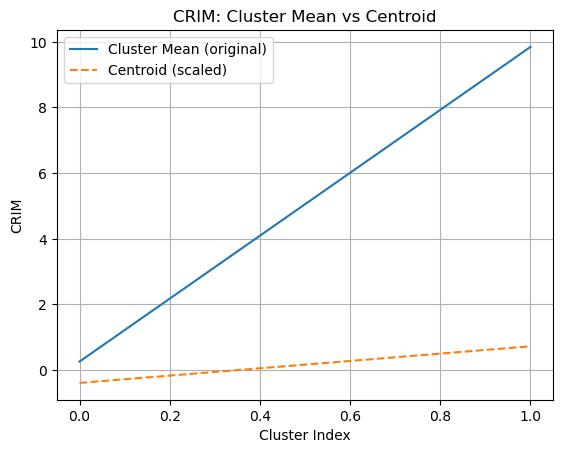

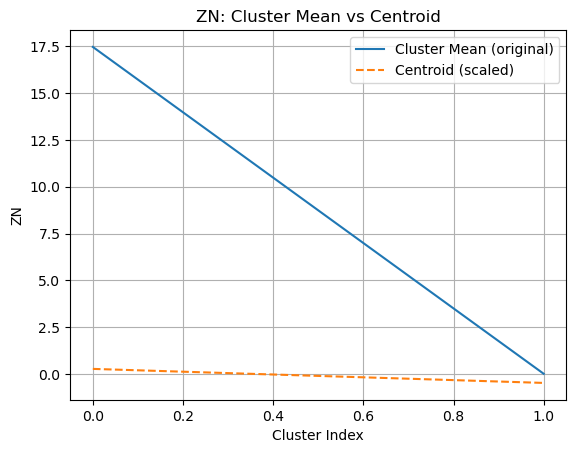

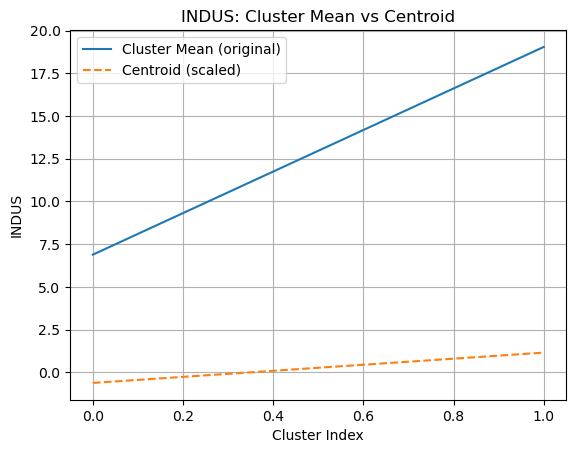

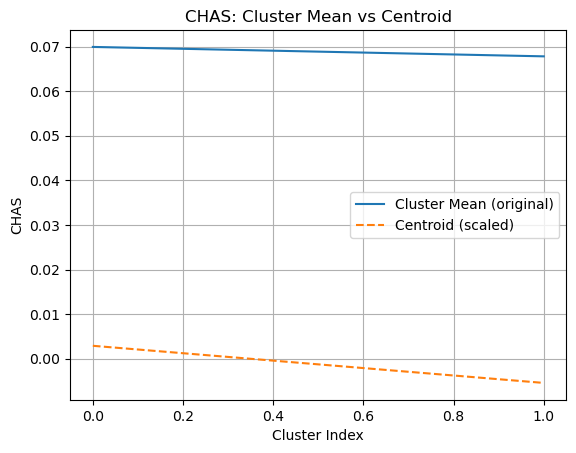

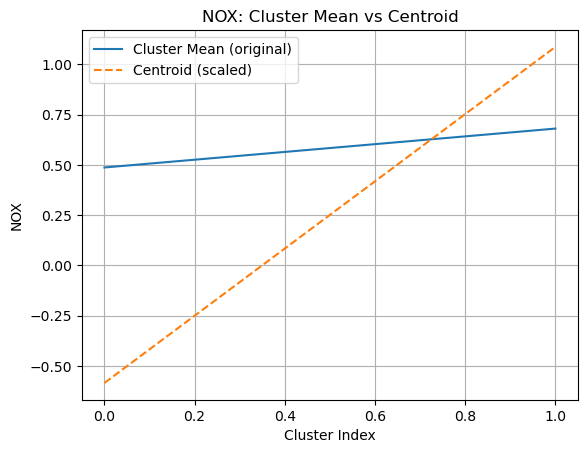

In [5]:
import os
import warnings
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.exceptions import ConvergenceWarning

os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
warnings.filterwarnings("ignore", category=ConvergenceWarning)


# Manually load Boston dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)

# Data cleaning and concatenation
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Create DataFrame
column_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS",
    "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]
df = pd.DataFrame(data, columns=column_names)
df['MEDV'] = target  # Add target variable

# Standardize all features (excluding MEDV)
features = df.drop(columns=["MEDV"])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Find optimal k value (2~6) using Silhouette score
silhouette_scores = []
k_range = range(2, 7)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Increased n_init for stability
    labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    silhouette_scores.append(score)
    print(f"Silhouette score for k={k}: {score:.4f}")

# Determine optimal k
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters k = {optimal_k}")

# Perform clustering with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Output cluster statistics (mean and variance)
cluster_stats = df.groupby('cluster').agg(['mean', 'var'])
print("\nFeature means and variances for each cluster:")
print(cluster_stats)

# Compare feature means with cluster centers (in standardized space)
centroids_scaled = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids_scaled)
centroids_df = pd.DataFrame(centroids_original, columns=features.columns)
print("\nCluster centroids in original feature space:")
print(centroids_df.round(4))  # Added rounding for better readability

# Mean values for each cluster (in original scale)
cluster_means = df.groupby('cluster').mean()

# Cluster centroids (in standardized feature space)
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=df.columns[:-2])  # exclude MEDV and cluster

# Print both dataframes
print("\nMean values for each cluster (original scale):")
display(cluster_means)

print("\nKMeans cluster centroids (standardized space):")
display(centroids_df)

# Visual comparison (first 5 features)
import matplotlib.pyplot as plt

features_to_plot = df.columns[:-2][:5]  # First 5 features
for feature in features_to_plot:
    plt.figure()
    plt.plot(cluster_means[feature].values, label='Cluster Mean (original)')
    plt.plot(centroids_df[feature].values, label='Centroid (scaled)', linestyle='--')
    plt.title(f'{feature}: Cluster Mean vs Centroid')
    plt.xlabel('Cluster Index')
    plt.ylabel(feature)
    plt.legend()
    plt.grid(True)
    plt.show()



Adjusted Rand Index (ARI): 0.8975
Silhouette Score: 0.2849

Feature means for each cluster:
           alcohol  malic_acid       ash  alcalinity_of_ash   magnesium  \
cluster                                                                   
0        13.134118    3.307255  2.417647          21.241176   98.666667   
1        13.676774    1.997903  2.466290          17.462903  107.967742   
2        12.250923    1.897385  2.231231          20.063077   92.738462   

         total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
cluster                                                                     
0             1.683922    0.818824              0.451961         1.145882   
1             2.847581    3.003226              0.292097         1.922097   
2             2.247692    2.050000              0.357692         1.624154   

         color_intensity       hue  od280/od315_of_diluted_wines      proline  
cluster                                                           

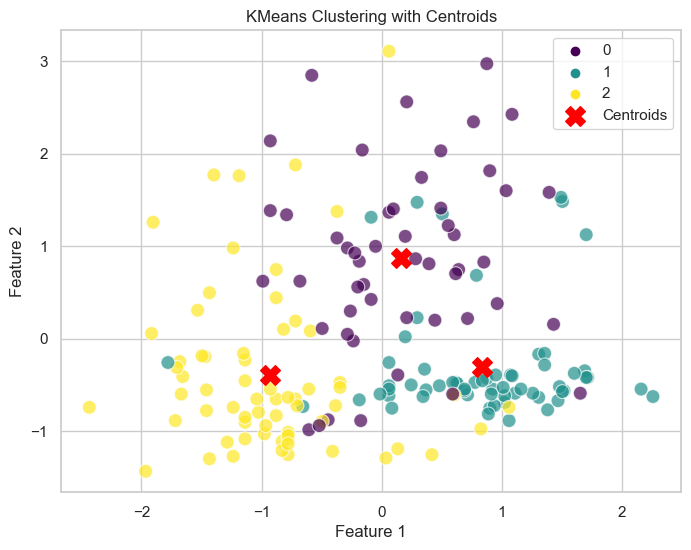

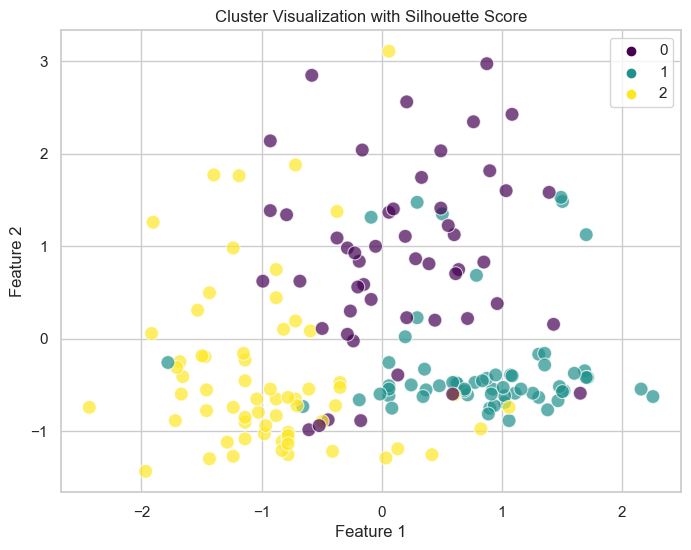

In [9]:
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Set OMP_NUM_THREADS to 1 to avoid memory leak warning
os.environ["OMP_NUM_THREADS"] = "1"

# Suppress UserWarnings related to KMeans memory leak
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

# Load Wine dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y_true = wine.target  # Ground truth labels (0,1,2)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform clustering
best_k = 3
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X_scaled)

# Evaluate clustering performance
ari = adjusted_rand_score(y_true, y_pred)
sil_score = silhouette_score(X_scaled, y_pred)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Silhouette Score: {sil_score:.4f}")

# Calculate feature means for each cluster
X['cluster'] = y_pred
stats = X.groupby("cluster").mean()
print("\nFeature means for each cluster:")
print(stats)

# Visualization

# 1. Plot the cluster centers
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y_pred, palette="viridis", s=100, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('KMeans Clustering with Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# 2. Silhouette score visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y_pred, palette="viridis", s=100, alpha=0.7)
plt.title('Cluster Visualization with Silhouette Score')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
